<a href="https://colab.research.google.com/github/Nelkit/36103-AT2-data-analysis-project/blob/nelkit/36103_AT2B_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment task 2: Data analysis project




## 📝 TODO List

✅ Project Overview  
- [ ] **1.1 Project Description**  
- [ ] **1.2 Business Objective**  
- [ ] **1.3 Research Questions**  

📥 Data Loading and Understanding  
- [x] ~~Load the dataset~~  
- [x] ~~Check for missing values and duplicates~~  
- [x] ~~Understand data types and structure~~  

📊 Exploratory Data Analysis (EDA)  
- [x] ~~3.1 Explore features~~
- [x] ~~3.2 Explore target variable~~
- [x] ~~Visualize distributions, correlations, and patterns~~

🎯 Feature Selection  
- [ ] **4.1 Feature Selection Approach** (correlation, importance scores, etc.)  
- [ ] **4.2 Final Selected Features**  

🛠 Data Preprocessing  
- [ ] **5.1 Data Cleaning** (handle missing values, outliers, duplicates)  
- [ ] **5.2 Feature Engineering** (create new features, transformations)  
- [ ] **5.3 Data Transformation** (scaling, encoding, normalization)  

🤖 Data Modeling  
- [ ] **6.1 Generate Predictions with Baseline Model**  
- [ ] **6.2 Assess the Baseline Model**  

📈 Model Evaluation  
- [ ] **7.1 Generate Predictions with Model Selected**  
- [ ] **7.2 Assess the Selected Model** (metrics, performance comparison)  

🔍 Insights and Conclusions  
- [ ] Summarize key findings  
- [ ] Discuss model performance and business impact  
- [ ] Identify limitations and potential improvements


## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [2]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36103,
    assignment="AT2",
)
at.run()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.0 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36103/assignment/AT2/data


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [4]:
!pip install scipy

### 0.d Import Packages

In [5]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec

### 0.f Reusable Functions

In [120]:
def plotting_num_feature_distributions(data, col, color = '#F9B123', dataset_name="", width=10, height=4):
  col_name = col.capitalize()
  # 1. Summary Statistics
  summary_stats = data[col].describe()
  print(f"Summary Statistics of {col_name} in {dataset_name}:")
  print(summary_stats)

  fig = plt.figure(figsize=(width, height))
  gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4])

  # 2. Boxplot and Histogram plot
  ax_box = plt.subplot(gs[0, 0])
  sns.boxplot(x=data[col], ax=ax_box, color=color)
  ax_box.set(title=f'Boxplot and Histogram of {col_name} in {dataset_name}')
  ax_box.set(xlabel='')
  ax_box.set_xticklabels([])

  ax_hist = plt.subplot(gs[1, 0])
  sns.histplot(data, x=col, ax=ax_hist, color=color, bins=30, kde=False)
  ax_box.set_xlim(ax_hist.get_xlim())

  # 3. QQ plot
  ax_qq = plt.subplot(gs[:, 1])
  stats.probplot(data[col], dist="norm", plot=ax_qq)
  ax_qq.set_title(f'QQ Plot of {col_name} in {dataset_name}')

  plt.tight_layout()
  plt.show()

def plotting_cat_feature_distributions(data, col, dataset_name = ""):
  col_name = col.capitalize()
  print(f"Summary Statistics of {col_name} in {dataset_name}:")
  summary_stats = data[col].describe()
  print(summary_stats)

  target_count = data[col].value_counts()
  sizes = target_count.values
  total_records = len(data[col])
  category_order = target_count.index

  plt.figure(figsize=(8, 5))
  sns.countplot(data=data, x=col, hue=col, palette="Set1", order=category_order)
  plt.title(f"Distribution of {col_name} in {dataset_name}")
  for s, value in enumerate(sizes):
      percentage = (value / total_records) * 100
      percentage = round(percentage, 2)
      plt.text(s, value, f'{value} \n ({percentage}%)', color="#333", ha='center', va='bottom', fontsize=10, weight="bold")

  plt.xlabel(col_name)
  plt.ylabel("Count")
  plt.xticks(rotation=45, ha='right')
  plt.show()

def get_corr_of_predictors(method, data, predictors_names, width=6, height=5):
  continuous_data = data[predictors_names]

  correlation_matrix = continuous_data.corr(method=method)
  plt.figure(figsize=(width, height))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title(f'Correlation Matrix of Predictors using {method.capitalize()} method')
  plt.show()

  return correlation_matrix

def check_duplicates(data):
    duplicates = data.duplicated()
    duplicates_count = duplicates.sum()
    total_records = len(data)
    percentage_duplicates = (duplicates_count / total_records) * 100
    percentage_duplicates = round(percentage_duplicates, 2)

    print(f'There are {duplicates_count} of {total_records} ({percentage_duplicates})% duplicates rows')
    return duplicates

def check_missing_values(data):
    missing_counts = data.isnull().sum()
    total_records = len(data)
    missing_summary = missing_counts[missing_counts > 0].sort_values(ascending=False)

    if missing_summary.empty:
        print("There are no missing values in the dataset.")
    else:
        print("Missing values per column:")
        for column, count in missing_summary.items():
            percentage = (count / total_records) * 100
            print(f"- {column}: {count} missing ({round(percentage, 2)}%)")

    return data.isnull()

def check_shape(data):
    rows, columns = data.shape
    print(f'The dataset has {rows} rows and {columns} columns.')
    return data.shape

def get_corr_of_predictors_and_target(method, data, target_name, predictors_names, width=6, height=3):
  continuous_data = data[predictors_names + [target_name]]

  correlation_matrix = continuous_data.corr(method=method)
  ly_corr = correlation_matrix[target_name].sort_values(ascending=False)
  plt.figure(figsize=(width, height))
  sns.barplot(x=ly_corr.index, y=ly_corr.values, palette='coolwarm', hue=ly_corr.values)
  plt.title(f'Correlation of {target_name} with other attributes using {method.capitalize()} method')
  plt.xlabel('Attributes')
  plt.ylabel('Correlation Coefficient')

  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

  plt.show()
  return correlation_matrix

def plotting_target_and_predictors(data, col, target, palette='pastel'):
  print(f"{col.capitalize()} Summary")
  print(data.groupby(col)[target].value_counts(normalize=True))

  plt.figure(figsize=(8, 5))
  sns.countplot(data=data, x=col, hue=target, palette=palette)
  plt.title(f"Relationship between {target} and {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Customer Count")
  plt.xticks(rotation=45, ha='right')
  plt.show()
  print("\n")

def plotting_target_and_num_predictors(data, col, target, palette='pastel'):
  print(f"{col.capitalize()} Summary")
  print(data.groupby(target)[col].describe())

  plt.figure(figsize=(6, 4))
  sns.boxplot(x=target, y=col, data=data, hue=target, palette=palette)
  plt.title(f'Distribution of {col} vs {target} variable')
  plt.show()

  print("\n")



## 1. Project Overview

### 1.1 Project Description

`Type your project decription here`

### 1.2 Business Objective

`Type your business objective here`

### 1.3 Research Questions

`Type your research Questions here`

## 2. Data Loading

In [79]:
original_df = pd.read_csv(at.folder_path / "UCI_Credit_Card.csv")

## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Understanding

In [80]:
original_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [81]:
original_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [82]:
check_shape(original_df)

The dataset has 30000 rows and 25 columns.


(30000, 25)

In [83]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [84]:
original_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [85]:
check_duplicates(original_df)

There are 0 of 30000 (0.0)% duplicates rows


,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


In [86]:
check_missing_values(original_df)

There are no missing values in the dataset.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


> #### **Section 3.1 Insights**

- The dataset contains 30,000 rows and 25 columns.
- It includes 20 numerical and 4 categorical predictors.
- The target variable is `default.payment.next.month`.
- There are 0 duplicate rows out of 30,000 (0.0%).
- There are no missing values in the dataset.

### 3.2 Explore features

In [93]:
num_cols = list(original_df.select_dtypes(include=['int64', 'float64']).columns)
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
original_target_col = 'default.payment.next.month'
target_col = 'PAYMENT_DEFAULT'

# Convert the target variable to IS_DEFAULTER
if original_target_col in original_df.columns:
  original_df[target_col] = original_df[original_target_col]
  original_df.drop(original_target_col,axis = 1, inplace=True)

# Remove categorical columns from num_cols
num_cols = [col for col in num_cols if col not in cat_cols + ['ID', target_col]]

print("Numerical columns:")
print(num_cols)
print("\nCategorical columns:")
print(cat_cols)
print("\nTarget column:")
print(target_col)

Numerical columns:
['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Categorical columns:
['SEX', 'EDUCATION', 'MARRIAGE']

Target column:
PAYMENT_DEFAULT


In [ ]:
for col in num_cols:
  plotting_num_feature_distributions(original_df, col, dataset_name="Original set")

Summary Statistics of Sex in set:
count      30000
unique         2
top       FEMALE
freq       18112
Name: SEX, dtype: object


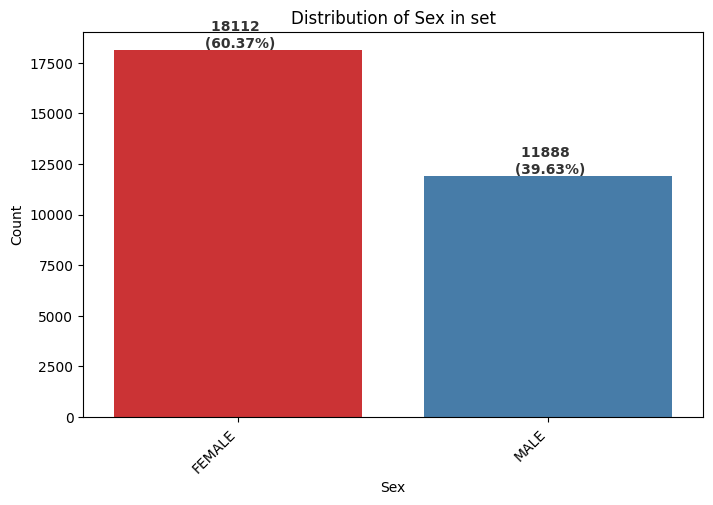

Summary Statistics of Education in set:
count          30000
unique             4
top       university
freq           14030
Name: EDUCATION, dtype: object


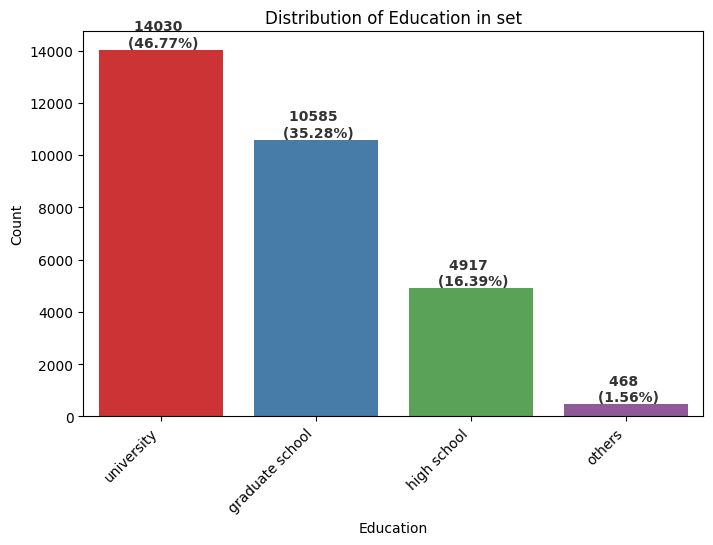

Summary Statistics of Marriage in set:
count      30000
unique         3
top       single
freq       15964
Name: MARRIAGE, dtype: object


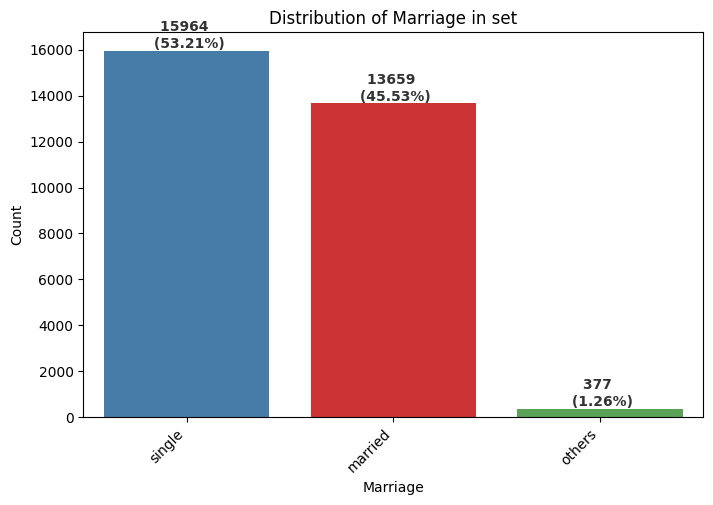

In [89]:
cat_df = original_df[cat_cols].copy()
cat_df[target_col] = original_df[target_col]

replace_dict = {
    'SEX': {1: 'MALE', 2: 'FEMALE'},
    'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school'},
    'MARRIAGE': {1: 'married', 2: 'single'},
    'PAYMENT_DEFAULT': {0: 'no', 1: 'yes'}
}

for col in replace_dict:
    cat_df[col] = original_df[col].map(replace_dict[col]).fillna('others')

for col in cat_cols:
    plotting_cat_feature_distributions(cat_df, col, dataset_name="set")

> #### **Section 3.2 Insights**

- The numerical predictors include: `LIMIT_BAL`, `AGE`, `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6`, `BILL_AMT1`, `BILL_AMT2`, `BILL_AMT3`, `BILL_AMT4`, `BILL_AMT5`, `BILL_AMT6`, `PAY_AMT1`, `PAY_AMT2`, `PAY_AMT3`, `PAY_AMT4`, `PAY_AMT5`, and `PAY_AMT6`.
- The categorical predictors are: `SEX`, `EDUCATION`, and `MARRIAGE`.
- The variables `LIMIT_BAL` and `AGE` are right-skewed and contain some outliers.
- The variables `BILL_AMT1`, `BILL_AMT2`, `BILL_AMTn`, and `PAY_AMTn` are also right-skewed and exhibit many outliers.
- The dataset contains more observations for females than males according to the `SEX` variable, with 18,112 records for females and 11,888 for males.
- In `EDUCATION`, the most frequent category is university, with 14,030 records.
- For `MARRIAGE`, the most common category is single, with 15,964 records.

### 3.3 Explore target variable

Summary Statistics of Payment_default in Original set:
count     30000
unique        2
top          no
freq      23364
Name: PAYMENT_DEFAULT, dtype: object


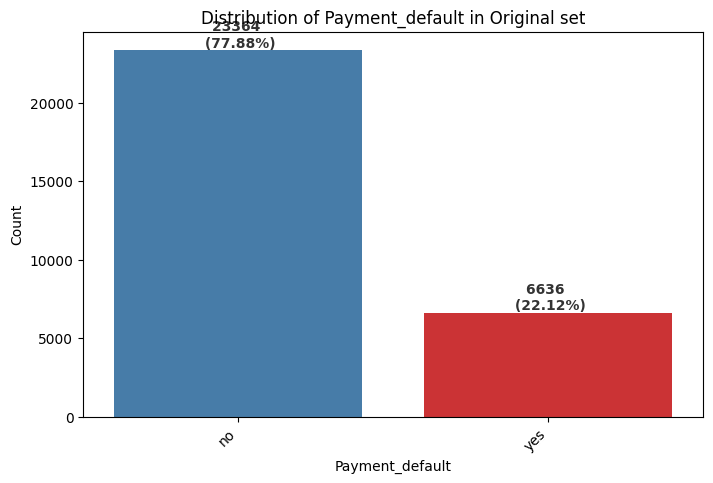

In [90]:
plotting_cat_feature_distributions(cat_df, target_col, dataset_name="Original set")

> #### **Section 3.3 Insights**

- The original target variable is `default.payment.next.month`, but it was renamed to `PAYMENT_DEFAULT` for easier handling.
- It is an imbalanced dataset, with 23,364 records (77.88%) labeled as no default and 6,636 records (22.12%) labeled as default.

### 3.4 Explore relationships between target and predictors

Sex Summary
SEX     PAYMENT_DEFAULT
FEMALE  no                 0.792237
        yes                0.207763
MALE    no                 0.758328
        yes                0.241672
Name: proportion, dtype: float64


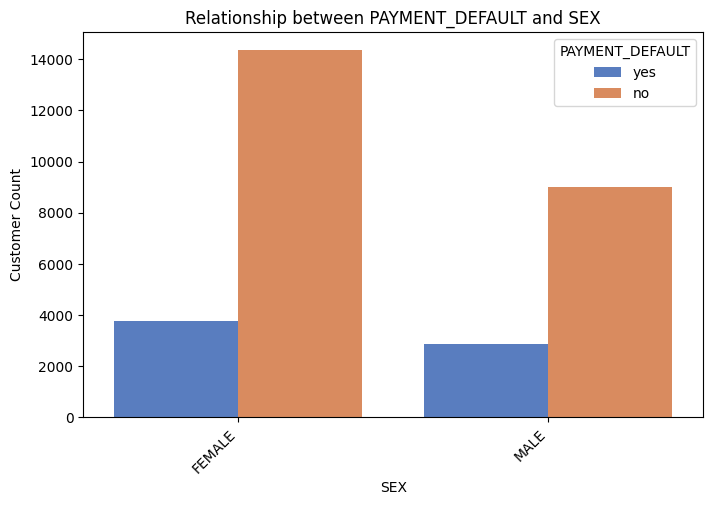



Education Summary
EDUCATION        PAYMENT_DEFAULT
graduate school  no                 0.807652
                 yes                0.192348
high school      no                 0.748424
                 yes                0.251576
others           no                 0.929487
                 yes                0.070513
university       no                 0.762651
                 yes                0.237349
Name: proportion, dtype: float64


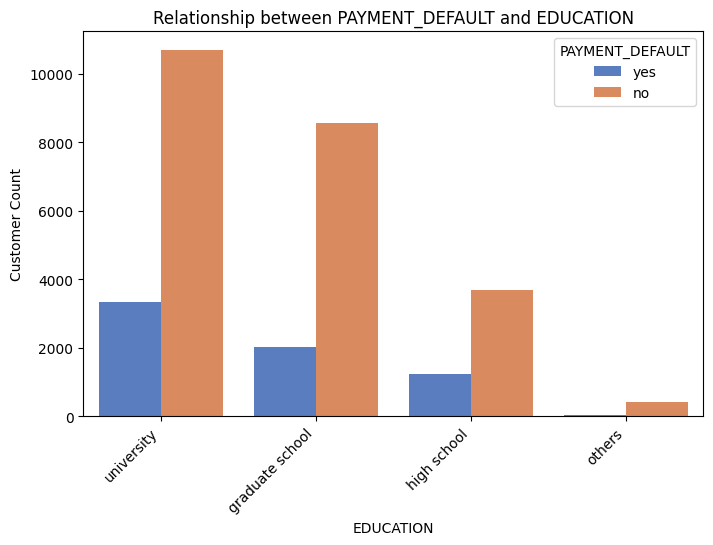



Marriage Summary
MARRIAGE  PAYMENT_DEFAULT
married   no                 0.765283
          yes                0.234717
others    no                 0.763926
          yes                0.236074
single    no                 0.790717
          yes                0.209283
Name: proportion, dtype: float64


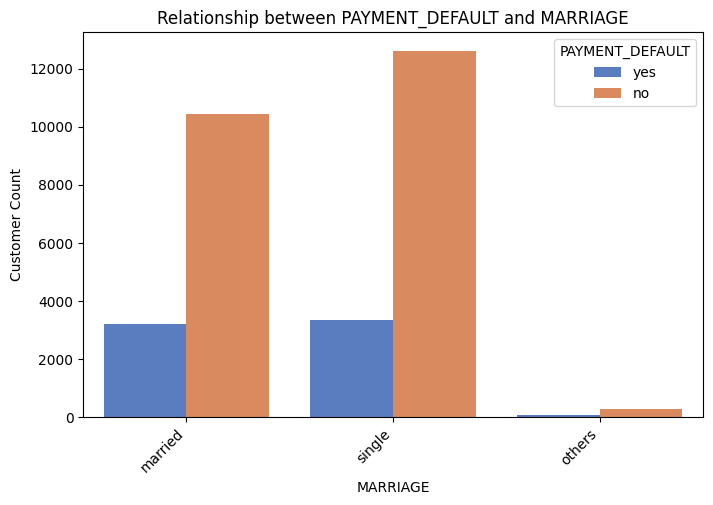

In [116]:
for col in cat_cols:
  plotting_target_and_predictors(cat_df, col, target_col, 'muted')

Limit_bal Summary
                   count           mean            std      min      25%  \
PAYMENT_DEFAULT                                                            
0                23364.0  178099.726074  131628.359660  10000.0  70000.0   
1                 6636.0  130109.656420  115378.540571  10000.0  50000.0   

                      50%       75%        max  
PAYMENT_DEFAULT                                 
0                150000.0  250000.0  1000000.0  
1                 90000.0  200000.0   740000.0  


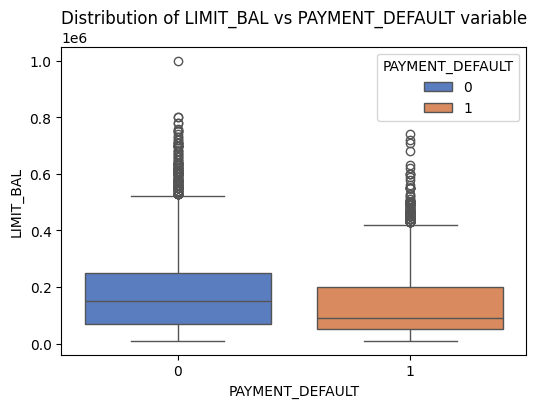



Age Summary
                   count       mean       std   min   25%   50%   75%   max
PAYMENT_DEFAULT                                                            
0                23364.0  35.417266  9.077355  21.0  28.0  34.0  41.0  79.0
1                 6636.0  35.725738  9.693438  21.0  28.0  34.0  42.0  75.0


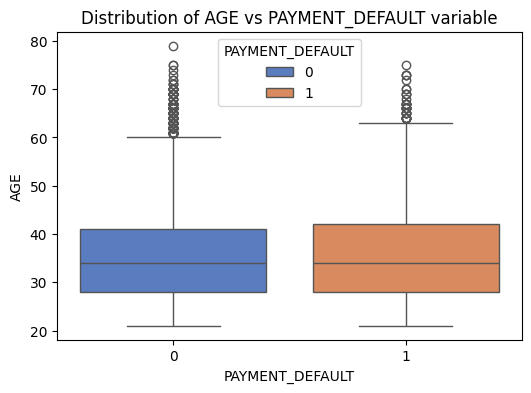



Pay_0 Summary
                   count      mean       std  min  25%  50%  75%  max
PAYMENT_DEFAULT                                                      
0                23364.0 -0.211222  0.952464 -2.0 -1.0  0.0  0.0  8.0
1                 6636.0  0.668174  1.383252 -2.0  0.0  1.0  2.0  8.0


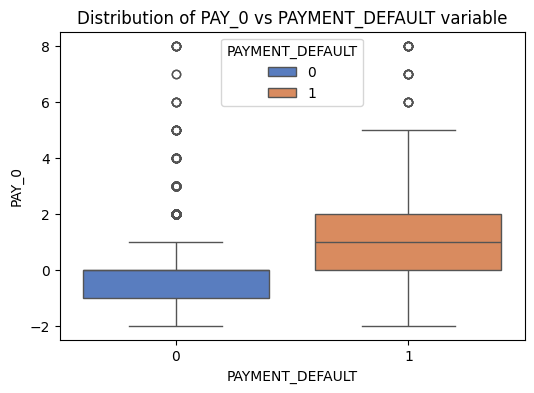



Pay_2 Summary
                   count      mean       std  min  25%  50%  75%  max
PAYMENT_DEFAULT                                                      
0                23364.0 -0.301917  1.035191 -2.0 -1.0  0.0  0.0  8.0
1                 6636.0  0.458258  1.502243 -2.0  0.0  0.0  2.0  7.0


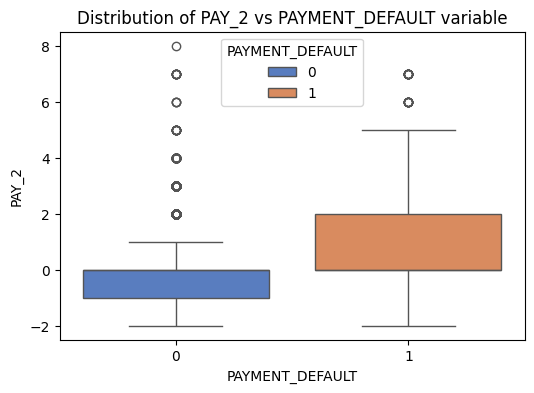



Pay_3 Summary
                   count      mean       std  min  25%  50%  75%  max
PAYMENT_DEFAULT                                                      
0                23364.0 -0.316256  1.048378 -2.0 -1.0  0.0  0.0  8.0
1                 6636.0  0.362116  1.499401 -2.0 -1.0  0.0  2.0  8.0


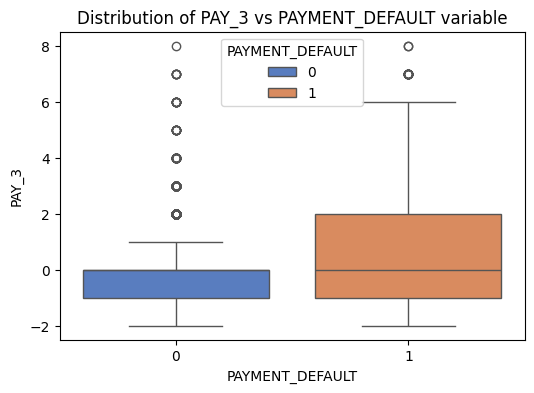



Pay_4 Summary
                   count      mean       std  min  25%  50%  75%  max
PAYMENT_DEFAULT                                                      
0                23364.0 -0.355633  1.013162 -2.0 -1.0  0.0  0.0  8.0
1                 6636.0  0.254521  1.508535 -2.0 -1.0  0.0  2.0  8.0


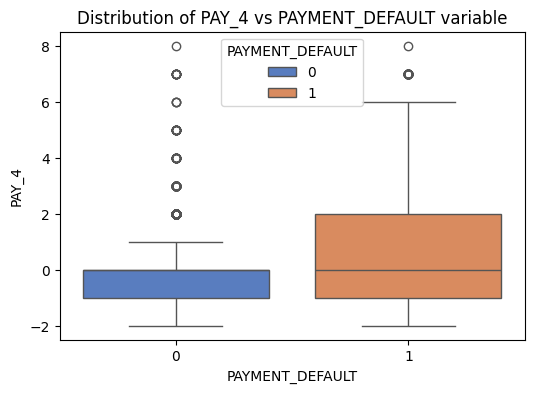



Pay_5 Summary
                   count      mean       std  min  25%  50%  75%  max
PAYMENT_DEFAULT                                                      
0                23364.0 -0.389488  0.977591 -2.0 -1.0  0.0  0.0  7.0
1                 6636.0  0.167872  1.482833 -2.0 -1.0  0.0  0.0  8.0


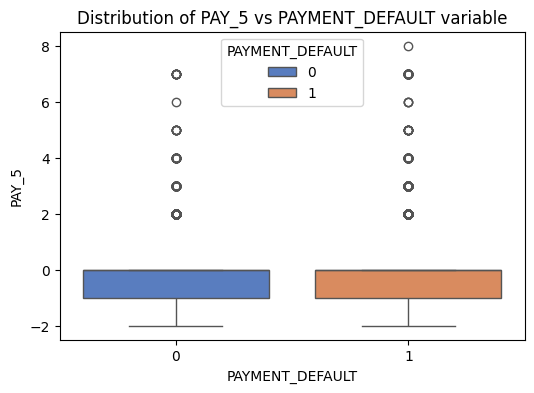



Pay_6 Summary
                   count      mean       std  min  25%  50%  75%  max
PAYMENT_DEFAULT                                                      
0                23364.0 -0.405624  1.005930 -2.0 -1.0  0.0  0.0  7.0
1                 6636.0  0.112116  1.485757 -2.0 -1.0  0.0  0.0  8.0


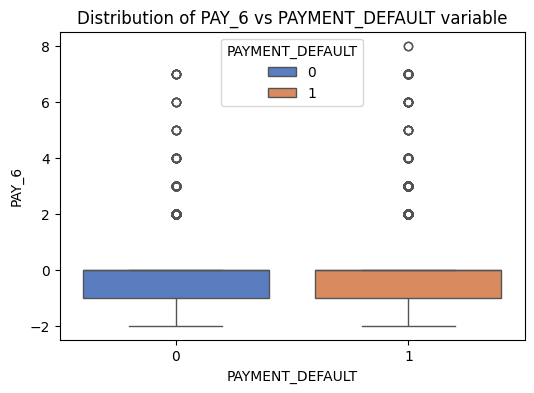



Bill_amt1 Summary
                   count          mean           std       min      25%  \
PAYMENT_DEFAULT                                                           
0                23364.0  51994.227273  73577.606694 -165580.0  3677.25   
1                 6636.0  48509.162297  73782.067220   -6676.0  2987.75   

                     50%      75%       max  
PAYMENT_DEFAULT                              
0                23119.5  69027.0  964511.0  
1                20185.0  59626.5  613860.0  


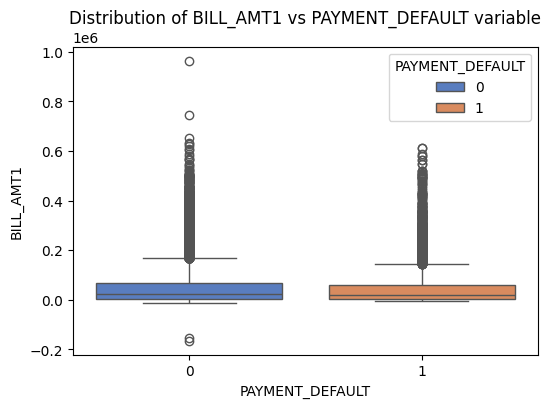



Bill_amt2 Summary
                   count          mean           std      min     25%  \
PAYMENT_DEFAULT                                                         
0                23364.0  49717.435670  71029.946709 -69777.0  3055.0   
1                 6636.0  47283.617842  71651.030364 -17710.0  2694.0   

                     50%       75%       max  
PAYMENT_DEFAULT                               
0                21660.5  65686.00  983931.0  
1                20300.5  57919.75  581775.0  


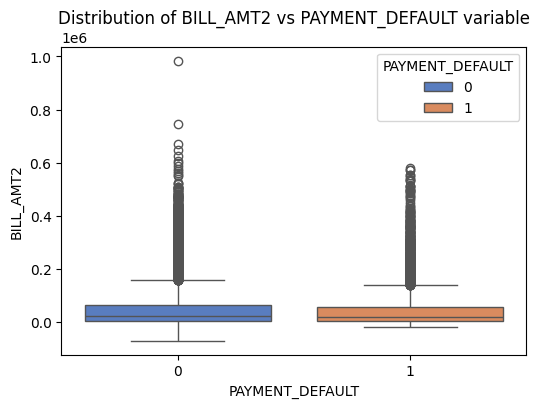



Bill_amt3 Summary
                   count          mean           std       min      25%  \
PAYMENT_DEFAULT                                                           
0                23364.0  47533.365605  69576.661008 -157264.0  2769.75   
1                 6636.0  45181.598855  68516.975738  -61506.0  2500.00   

                     50%       75%        max  
PAYMENT_DEFAULT                                
0                20202.5  61894.00  1664089.0  
1                19834.5  54733.75   578971.0  


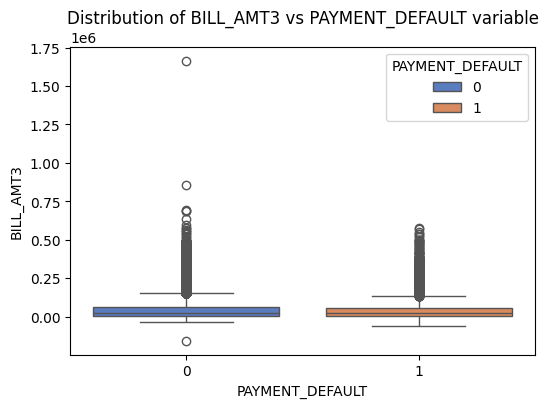



Bill_amt4 Summary
                   count          mean           std       min     25%  \
PAYMENT_DEFAULT                                                          
0                23364.0  43611.165254  64324.796730 -170000.0  2360.0   
1                 6636.0  42036.950573  64351.076092  -65167.0  2141.5   

                     50%       75%       max  
PAYMENT_DEFAULT                               
0                19000.0  55988.00  891586.0  
1                19119.5  50175.75  548020.0  


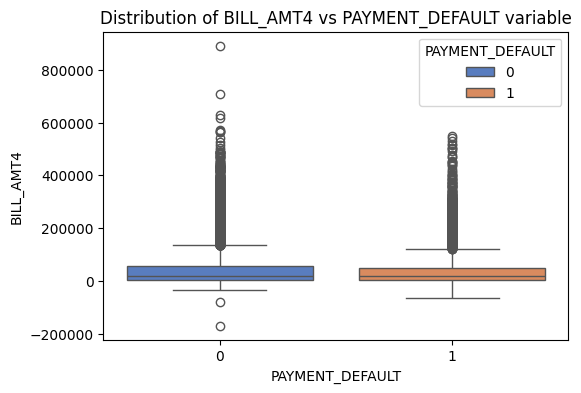



Bill_amt5 Summary
                   count          mean           std      min      25%  \
PAYMENT_DEFAULT                                                          
0                23364.0  40530.445343  60617.268112 -81334.0  1823.00   
1                 6636.0  39540.190476  61424.695949 -53007.0  1502.75   

                     50%       75%       max  
PAYMENT_DEFAULT                               
0                17998.0  51135.25  927171.0  
1                18478.5  47853.00  547880.0  


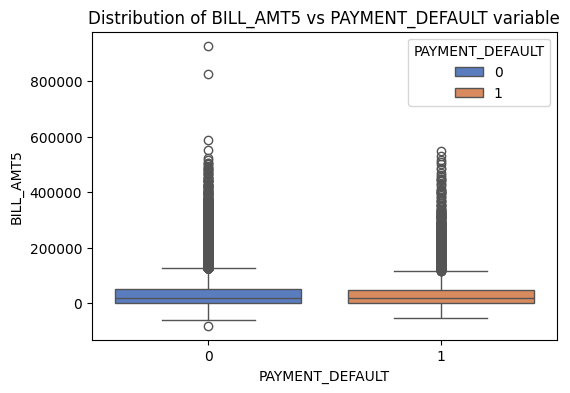



Bill_amt6 Summary
                   count          mean           std       min     25%  \
PAYMENT_DEFAULT                                                          
0                23364.0  39042.268704  59547.015717 -209051.0  1265.5   
1                 6636.0  38271.435503  59579.674268 -339603.0  1150.0   

                     50%      75%       max  
PAYMENT_DEFAULT                              
0                16679.0  49842.5  961664.0  
1                18028.5  47424.0  514975.0  


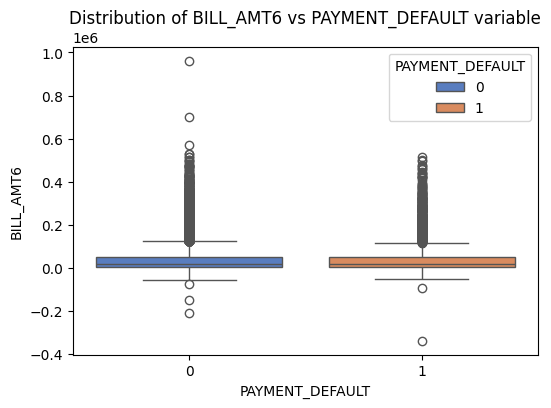



Pay_amt1 Summary
                   count         mean           std  min      25%     50%  \
PAYMENT_DEFAULT                                                             
0                23364.0  6307.337357  18014.508990  0.0  1163.75  2459.5   
1                 6636.0  3397.044153   9544.252427  0.0     0.00  1636.0   

                     75%       max  
PAYMENT_DEFAULT                     
0                5606.25  873552.0  
1                3478.25  300000.0  


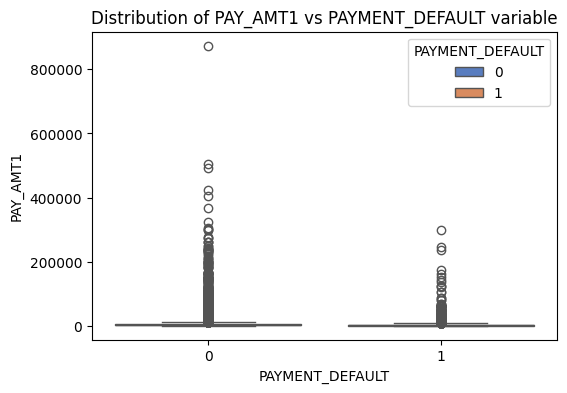



Pay_amt2 Summary
                   count         mean           std  min     25%     50%  \
PAYMENT_DEFAULT                                                            
0                23364.0  6640.465074  25302.263601  0.0  1005.0  2247.5   
1                 6636.0  3388.649638  11737.986064  0.0     0.0  1533.5   

                     75%        max  
PAYMENT_DEFAULT                      
0                5311.25  1684259.0  
1                3309.75   358689.0  


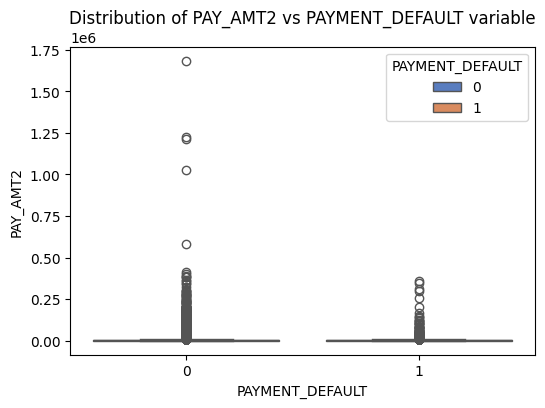



Pay_amt3 Summary
                   count         mean           std  min    25%     50%  \
PAYMENT_DEFAULT                                                           
0                23364.0  5753.496833  18684.255937  0.0  600.0  2000.0   
1                 6636.0  3367.351567  12959.624486  0.0    0.0  1222.0   

                    75%       max  
PAYMENT_DEFAULT                    
0                5000.0  896040.0  
1                3000.0  508229.0  


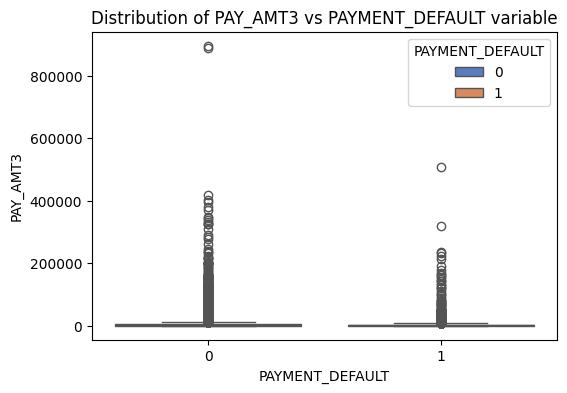



Pay_amt4 Summary
                   count         mean           std  min    25%     50%  \
PAYMENT_DEFAULT                                                           
0                23364.0  5300.529319  16689.778060  0.0  390.0  1734.0   
1                 6636.0  3155.626733  11191.973162  0.0    0.0  1000.0   

                     75%       max  
PAYMENT_DEFAULT                     
0                4602.00  621000.0  
1                2939.25  432130.0  


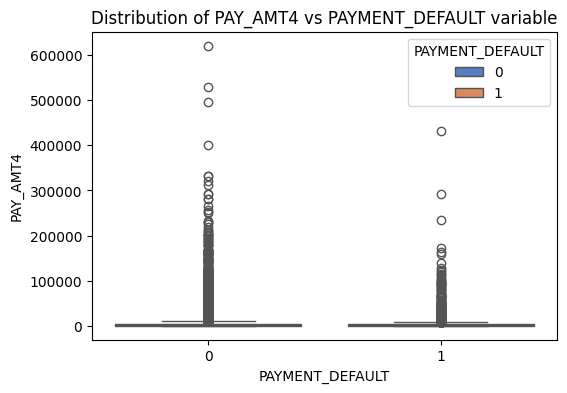



Pay_amt5 Summary
                   count         mean           std  min    25%     50%  \
PAYMENT_DEFAULT                                                           
0                23364.0  5248.220296  16071.667860  0.0  369.0  1765.0   
1                 6636.0  3219.139542  11944.731175  0.0    0.0  1000.0   

                    75%       max  
PAYMENT_DEFAULT                    
0                4600.0  426529.0  
1                3000.0  332000.0  


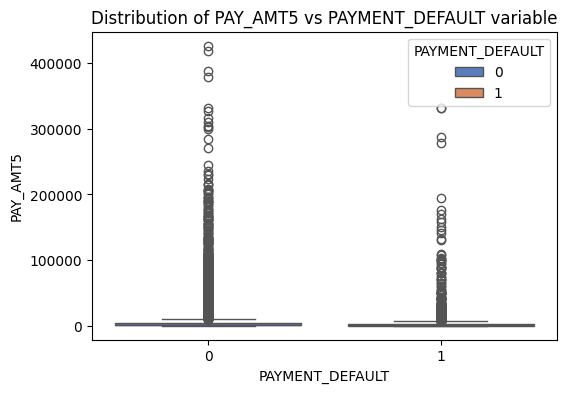



Pay_amt6 Summary
                   count         mean           std  min    25%     50%  \
PAYMENT_DEFAULT                                                           
0                23364.0  5719.371769  18792.950473  0.0  300.0  1706.0   
1                 6636.0  3441.482068  13464.005894  0.0    0.0  1000.0   

                    75%       max  
PAYMENT_DEFAULT                    
0                4545.0  528666.0  
1                2974.5  345293.0  


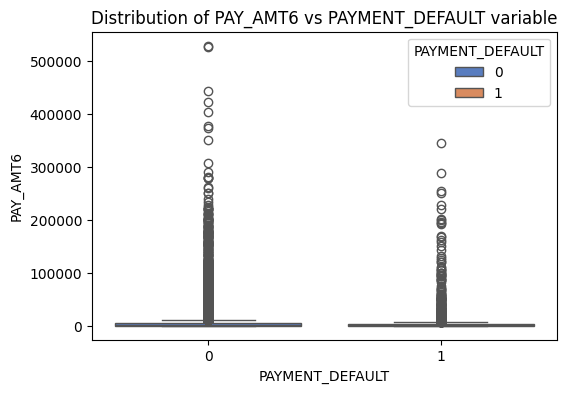

In [117]:
for col in num_cols:
  plotting_target_and_num_predictors(original_df, col, target_col, 'muted')

> #### **Section 3.4 Insights**

**Categorical**
- `SEX`: Females have a lower default rate (20.78%) than males (24.17%).
- `EDUCATION`: Default rates decrease with higher education:
  - Graduate school: 19.23%
  - University: 23.73%
  - High school: 25.16%
  - Others: 7.05%
- `MARRIAGE`: Single individuals have the lowest default rate (20.93%), followed by married (23.47%) and others (23.61%).

**Numerical**

- `LIMIT_BAL`:
  - Higher average for non-defaulters (`178,100` vs. `130,109` for defaulters).
  - Most non-defaulters have higher credit balances.

- `AGE`:
  - Similar averages between defaulters and non-defaulters (`35.42` vs. `35.73`).
  - Age distribution is similar for both groups.

- `PAY_0` to `PAY_6`:
  - Defaulters tend to have higher values, indicating late payments, compared to non-defaulters.
  - Non-defaulters have values close to `0` or negative, suggesting no late payments.

- `BILL_AMT1` to `BILL_AMT6`:
  - Non-defaulters have higher averages, indicating higher bill amounts.
  - Defaulters tend to have lower bill amounts compared to non-defaulters.

- `PAY_AMT1` to `PAY_AMT6`:
  - Defaulters tend to have lower payment amounts compared to non-defaulters.
  - The differences are notable, with defaulters showing lower averages in payments made.

Non-defaulters tend to have higher credit balances, higher bill amounts, and larger payments, while defaulters show lower values in most variables, suggesting a potential correlation between poor payment behavior and lower balances or payments.



## 4. Feature Selection

### 4.1 Feature Selection Approach 1: `Spearman Correlation`

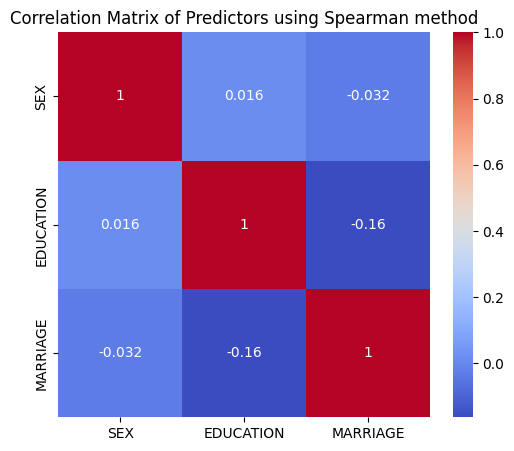

,SEX,EDUCATION,MARRIAGE
SEX,1.000000,0.015616,-0.031535
EDUCATION,0.015616,1.000000,-0.162415
MARRIAGE,-0.031535,-0.162415,1.000000


In [124]:
get_corr_of_predictors('spearman', original_df, cat_cols)

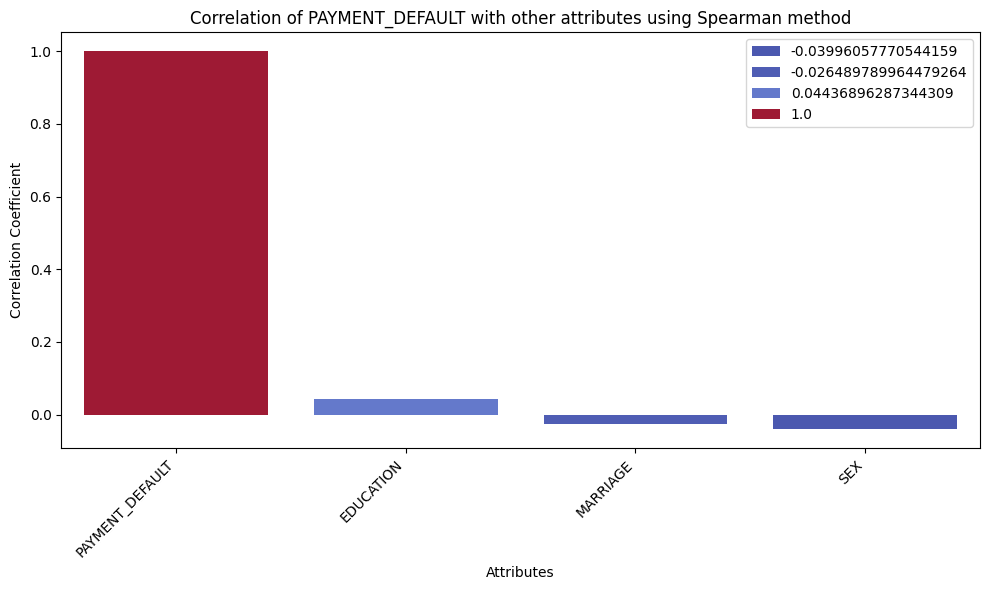

,SEX,EDUCATION,MARRIAGE,PAYMENT_DEFAULT
SEX,1.000000,0.015616,-0.031535,-0.039961
EDUCATION,0.015616,1.000000,-0.162415,0.044369
MARRIAGE,-0.031535,-0.162415,1.000000,-0.026490
PAYMENT_DEFAULT,-0.039961,0.044369,-0.026490,1.000000


In [122]:
get_corr_of_predictors_and_target('spearman', original_df, target_col, cat_cols, 10, 6)

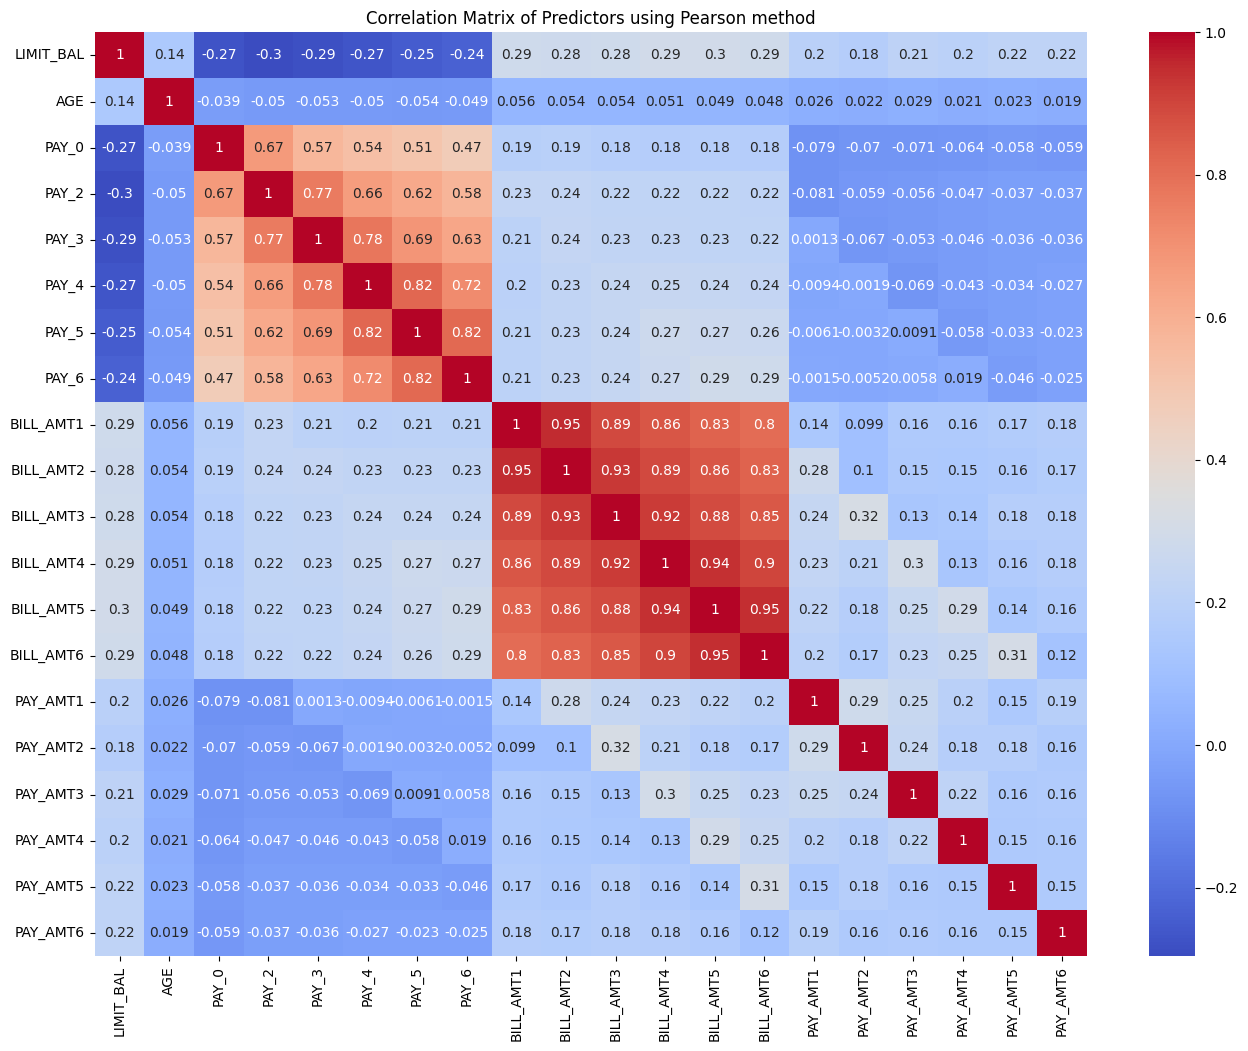

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027
PAY_6,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299
BILL_AMT1,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256


In [30]:
get_corr_of_predictors('pearson', original_df, num_cols, 16, 12)

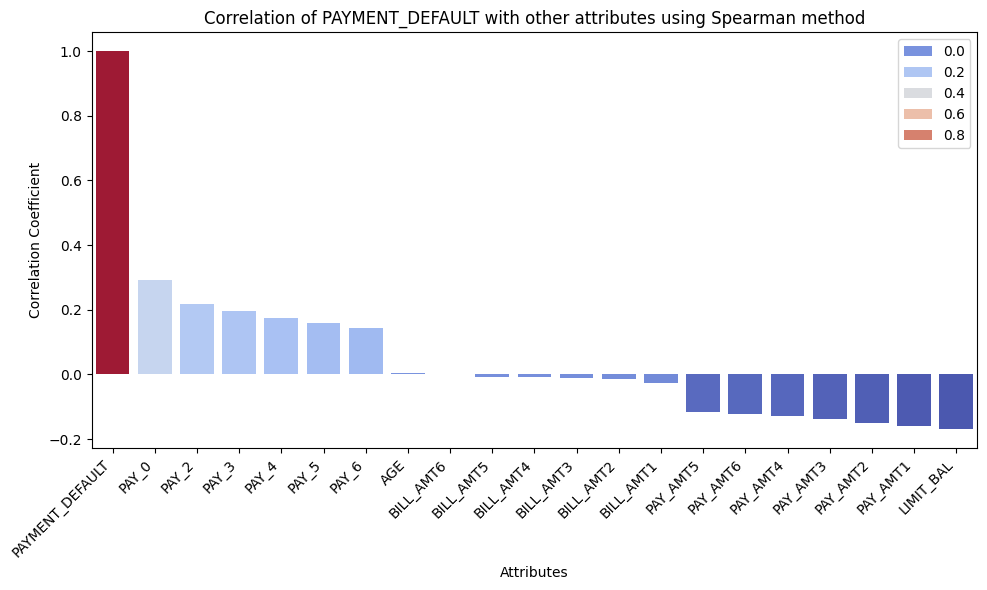

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAYMENT_DEFAULT
LIMIT_BAL,1.000000,0.186485,-0.296461,-0.342596,-0.331615,-0.308658,-0.284936,-0.264105,0.054384,0.048586,...,0.072894,0.080694,0.088094,0.272367,0.278401,0.284468,0.283411,0.293749,0.317459,-0.169586
AGE,0.186485,1.000000,-0.063733,-0.083271,-0.083192,-0.080190,-0.083149,-0.076144,0.001019,0.001513,...,-0.003330,-0.000342,0.000217,0.033580,0.044192,0.033356,0.040529,0.038125,0.038977,0.005149
PAY_0,-0.296461,-0.063733,1.000000,0.627170,0.548112,0.516156,0.486441,0.463892,0.314574,0.329814,...,0.306818,0.298782,0.289055,-0.098315,-0.063549,-0.054153,-0.034312,-0.026223,-0.045015,0.292213
PAY_2,-0.342596,-0.083271,0.627170,1.000000,0.799388,0.713212,0.673749,0.635207,0.571325,0.551146,...,0.497540,0.478029,0.459427,0.020401,0.083520,0.087311,0.095036,0.099155,0.082265,0.216919
PAY_3,-0.331615,-0.083192,0.548112,0.799388,1.000000,0.801047,0.718457,0.671428,0.524146,0.588586,...,0.531436,0.507209,0.484530,0.215548,0.037020,0.103370,0.118790,0.124204,0.098356,0.194771
PAY_4,-0.308658,-0.080190,0.516156,0.713212,0.801047,1.000000,0.822179,0.731866,0.512443,0.558359,...,0.592718,0.561290,0.533639,0.185478,0.246221,0.069251,0.144446,0.161743,0.142570,0.173690
PAY_5,-0.284936,-0.083149,0.486441,0.673749,0.718457,0.822179,1.000000,0.820880,0.499136,0.537640,...,0.649666,0.618225,0.579321,0.175423,0.221993,0.260066,0.106758,0.184848,0.172170,0.159043
PAY_6,-0.264105,-0.076144,0.463892,0.635207,0.671428,0.731866,0.820880,1.000000,0.488392,0.523644,...,0.606196,0.667710,0.629897,0.177536,0.199939,0.237571,0.283836,0.141080,0.197928,0.142523
BILL_AMT1,0.054384,0.001019,0.314574,0.571325,0.524146,0.512443,0.499136,0.488392,1.000000,0.911133,...,0.807302,0.769048,0.734275,0.502339,0.472158,0.440547,0.441925,0.424971,0.410465,-0.025327
BILL_AMT2,0.048586,0.001513,0.329814,0.551146,0.588586,0.558359,0.537640,0.523644,0.911133,1.000000,...,0.848381,0.802947,0.765220,0.635634,0.497603,0.468164,0.461064,0.448785,0.429334,-0.015554


In [123]:
get_corr_of_predictors_and_target('spearman', original_df, target_col, num_cols, 10, 6)


#### Section 4.1 Insights

**Categorical Variables**
- `SEX, EDUCATION, MARRIAGE, PAYMENT_DEFAULT`: Minimal correlations between these variables (values near 0). No significant relationships.

**Numerical Variables**
- `LIMIT_BAL`:
  - Weak positive correlation with `AGE` (0.19).
  - Negative correlation with overdue payments (`PAY_0` to `PAY_6`).
  - Positive correlation with `PAY_AMT1` to `PAY_AMT6`.
- `ILL_AMT1 to BILL_AMT6`: Strong correlations among these variables, indicating that higher bills are consistent across months.
- `PAY_AMT1 to PAY_AMT6`: Positive correlations, indicating consistency in payments.
- `PAYMENT_DEFAULT`: Negative correlation with most financial variables, suggesting defaults are associated with lower credit limits and smaller payments.

---

In this case, using Spearman's correlation allows us to understand relationships between both categorical and numerical features, helping to select the most informative variables for further analysis or modeling.

### 4.2 Feature Selection Approach 2

### 4.3 Final Selected Features

## 5. Data Preprocessing

### 5.1 Data Cleaning

### 5.2. Feature Engineering

### 5.3 Data Transformation

## 6. Data Modeling

### 6.1 Generate Predictions with Baseline Model

### 6.2 Assess the Baseline Model

## 7. Model Evaluation

### 7.1 Generate Predictions with Model Selected

### 7.2 Assess the Selected Model

## 8. Insights and Conclusions